In [84]:
import requests
from config import api_key
import matplotlib.pyplot as plt

In [90]:
%load_ext lab_black

In [62]:
# r = requests.get("https://api.openweathermap.org/data/2.5/weather?id=2172797&appid=38855b2128faf2e8f8a56827db94097e")

In [63]:
r.status_code

200

In [68]:
data = r.json()
data

{'coord': {'lon': 145.77, 'lat': -16.92},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 300.83,
  'feels_like': 301.62,
  'temp_min': 300.15,
  'temp_max': 301.48,
  'pressure': 1015,
  'humidity': 57},
 'visibility': 10000,
 'wind': {'speed': 3.1, 'deg': 170},
 'clouds': {'all': 40},
 'dt': 1600906050,
 'sys': {'type': 1,
  'id': 9490,
  'country': 'AU',
  'sunrise': 1600891495,
  'sunset': 1600935182},
 'timezone': 36000,
 'id': 2172797,
 'name': 'Cairns',
 'cod': 200}

In [67]:
lat = data["coord"]["lat"]
lat

-16.92

In [77]:
temp_k = data["main"]["temp"]
temp_k

300.83

In [73]:
cloud_percent = data["clouds"]["all"]
cloud_percent

40

In [78]:
humidity_percent = data["main"]["humidity"]
humidity_percent

57

In [79]:
wind_speed_meters_sec = data["wind"]["speed"]
wind_speed_meters_sec

3.1

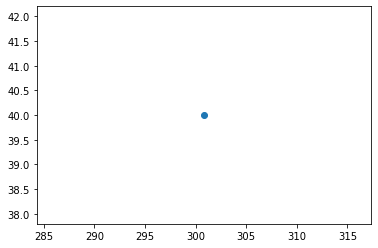

In [85]:
# Scatter plot for temp and cloudiness
plt.scatter(temp_k, cloud_percent)
plt.show()

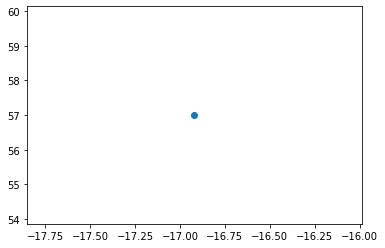

In [87]:
# Scatter plot for humidity and latitude
plt.scatter(lat, humidity_percent)
plt.show()

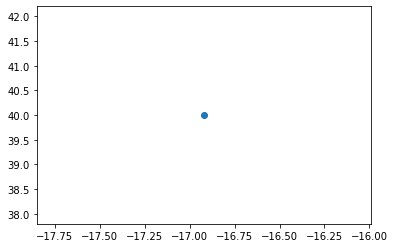

In [88]:
# Scatter plot for cloudiness and latitude
plt.scatter(lat, cloud_percent)
plt.show()

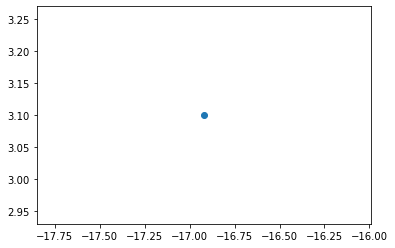

In [89]:
# Scatter plot for wind speed and latitude
plt.scatter(lat, wind_speed_meters_sec)
plt.show()

In [ ]:
# Divide out the latitudes into northern or southern hemsipheres

north_lat = []
south_lat = []

# add latitudes to proper list

if lat >= 0:
    north_lat.append(lat)
else:
    south_lat.append(lat)
    
print(f"The northern latitudes are: {north_lat}")
print(f"The souther latitudes are: {south_lat}")

In [ ]:
# Linear Regression: Northern Hemisphere - Temperature (F) vs. Latitude



In [ ]:
# Linear Regression: Southern Hemisphere - Temperature (F) vs. Latitude



In [ ]:
# Linear Regression: Northern Hemisphere - Humidity (%) vs. Latitude



In [ ]:
# Linear Regression: Southern Hemisphere - Humidity (%) vs. Latitude



In [ ]:
# Linear Regression: Northern Hemisphere - Cloudiness (%) vs. Latitude



In [ ]:
# Linear Regression: Southern Hemisphere - Cloudiness (%) vs. Latitude



In [ ]:
# Linear Regression: Northern Hemisphere - Wind Speed (mph) vs. Latitude



In [ ]:
# Linear Regression: Southern Hemisphere - Wind Speed (mph) vs. Latitude

